In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

In [2]:
size_points = 10
media_point = np.array([0, 3])
radius_point = 2

# Generate random points uniformly distributed within a circle
# Use polar coordinates: random radius and random angle for POSITION only
random_r = np.sqrt(np.random.uniform(0, 1, size_points)) * radius_point
random_theta_position = np.random.uniform(0, 2 * np.pi, size_points)

# Convert to Cartesian coordinates and add center offset
random_x = media_point[0] + random_r * np.cos(random_theta_position)
random_y = media_point[1] + random_r * np.sin(random_theta_position)

# Parameters for normal distribution of DIRECTION angles
median_angle = np.pi  # Median angle (e.g., π = left direction)
std_dev_angle = np.pi / 8  # Standard deviation (e.g., π/4 = 45 degrees)

# Generate random theta values for DIRECTION using normal distribution
random_theta = np.random.normal(median_angle, std_dev_angle, size_points)

# Combine into array of points (x, y)
random_points = np.column_stack((random_x, random_y, random_theta))

print(f"Generated {size_points} random points within circle")
print(f"Center: {media_point}, Radius: {radius_point}")
print(f"Direction angles - Mean: {median_angle:.3f}, Std Dev: {std_dev_angle:.3f}")


Generated 10 random points within circle
Center: [0 3], Radius: 2
Direction angles - Mean: 3.142, Std Dev: 0.393


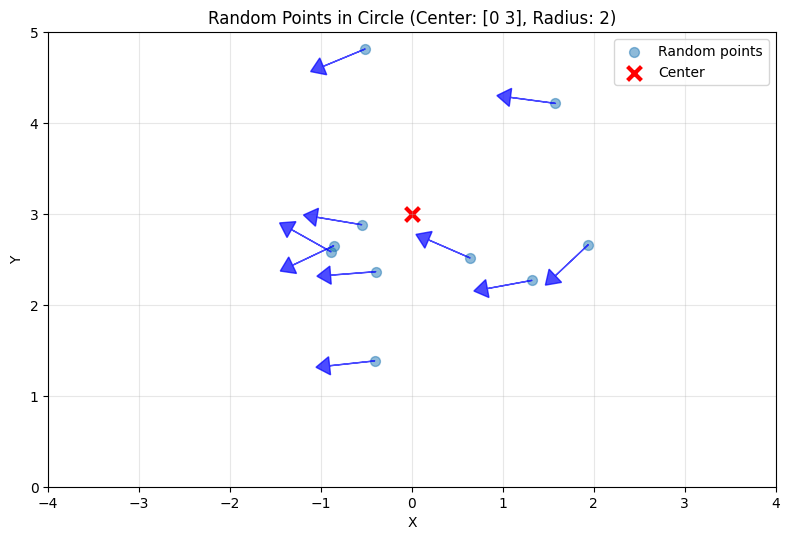

In [3]:
# Control axis limits
x_min, x_max = -4, 4
y_min, y_max = -0, 5

# Create figure and plot
fig, ax = plt.subplots(figsize=(8, 8))

# Plot random points
ax.scatter(random_points[:, 0], random_points[:, 1], alpha=0.5, s=50, label='Random points', zorder=3)

# Plot direction arrows for each point
arrow_length = 0.5
for i in range(len(random_points)):
    x, y, theta = random_points[i]
    dx = arrow_length * np.cos(theta)
    dy = arrow_length * np.sin(theta)
    ax.arrow(x, y, dx, dy, head_width=0.2, head_length=0.15, fc='blue', ec='blue', alpha=0.7, zorder=4)

# Plot center point
ax.scatter(media_point[0], media_point[1], color='red', s=100, marker='x', linewidths=3, label='Center')

# # Draw circle boundary
# circle = plt.Circle((media_point[0], media_point[1]), radius_point, color='red', fill=False, linestyle='--', linewidth=2, label='Boundary')
# ax.add_patch(circle)

# Set axis limits
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# Labels and formatting
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title(f'Random Points in Circle (Center: {media_point}, Radius: {radius_point})')
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.legend()

plt.tight_layout()
plt.show()


In [4]:
def generate_random_points_in_circle(media, size, radius, median_angle=np.pi, std_dev_angle=np.pi/4):
    """
    Generate random points uniformly distributed in a circle with direction angles.
    
    Parameters:
    - media: center point [x, y]
    - size: number of points to generate
    - radius: radius of the circle
    - median_angle: mean direction angle (default: π = left)
    - std_dev_angle: standard deviation of direction angles (default: π/4 = 45°)
    
    Returns:
    - points: array of shape (size, 2) with (x, y) positions
    - theta_directions: array of shape (size,) with direction angles
    """
    # Generate random points uniformly distributed within a circle (position only)
    random_r = np.sqrt(np.random.uniform(0, 1, size)) * radius
    random_theta_position = np.random.uniform(0, 2 * np.pi, size)
    
    # Convert to Cartesian coordinates
    random_x = media[0] + random_r * np.cos(random_theta_position)
    random_y = media[1] + random_r * np.sin(random_theta_position)
    
    points = np.column_stack((random_x, random_y))
    
    # Generate direction angles using normal distribution
    theta_directions = np.random.normal(median_angle, std_dev_angle, size)
    
    return points, theta_directions

def plot_points_in_circle(points, media, radius, theta_directions=None, x_range=None, y_range=None, show_circle=False, show_arrows=False, arrow_length=0.5):
    """
    Plot points in a circle with optional direction arrows.
    
    Parameters:
    - points: array of (x, y) positions
    - media: center point [x, y]
    - radius: radius of the circle
    - theta_directions: optional array of direction angles for each point
    - x_range: optional tuple (x_min, x_max)
    - y_range: optional tuple (y_min, y_max)
    - show_circle: whether to show circle boundary
    - show_arrows: whether to show direction arrows (requires theta_directions)
    - arrow_length: length of direction arrows
    """
    fig, ax = plt.subplots(figsize=(8, 8))
    
    ax.scatter(points[:, 0], points[:, 1], alpha=0.5, s=10, label='Points')
    ax.scatter(media[0], media[1], color='red', s=100, marker='x', linewidths=3, label='Center')
    
    # Plot direction arrows if requested and theta_directions provided
    if show_arrows and theta_directions is not None:
        for i, (point, theta) in enumerate(zip(points, theta_directions)):
            dx = arrow_length * np.cos(theta)
            dy = arrow_length * np.sin(theta)
            ax.arrow(point[0], point[1], dx, dy, 
                    head_width=0.2, head_length=0.15, 
                    fc='blue', ec='blue', alpha=0.6, linewidth=1.5)
    
    if show_circle:
        circle = plt.Circle((media[0], media[1]), radius, color='red', fill=False, linestyle='--', linewidth=2, label='Boundary')
        ax.add_patch(circle)
    
    if x_range is None:
        x_min, x_max = media[0] - radius - 1, media[0] + radius + 1
    else:
        x_min, x_max = x_range
    
    if y_range is None:
        y_min, y_max = media[1] - radius - 1, media[1] + radius + 1
    else:
        y_min, y_max = y_range
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    title = f'Random Points in Circle (Center: {media}, Radius: {radius})'
    if show_arrows:
        title += ' with Directions'
    ax.set_title(title)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    plt.tight_layout()
    plt.show()

def generate_spline_path(start_point, spline_points, target_point, num_points=300):
    from scipy.interpolate import CubicSpline
    
    path_points = np.vstack([start_point, spline_points, target_point])
    
    t = np.arange(len(path_points))
    
    cs_x = CubicSpline(t, path_points[:, 0])
    cs_y = CubicSpline(t, path_points[:, 1])
    
    t_smooth = np.linspace(0, len(path_points) - 1, num_points)
    path_x = cs_x(t_smooth)
    path_y = cs_y(t_smooth)
    
    smooth_path = np.column_stack((path_x, path_y))
    
    return smooth_path, path_points

Generated 20 points
Center: [2 5], Radius: 4
Points shape: (20, 2)
Directions shape: (20,)
Direction angles - Mean: 3.142, Std Dev: 0.314

First 5 points:
[[-1.13822408  5.21494542]
 [-0.48864779  4.9233865 ]
 [ 1.73703046  3.33563663]
 [ 2.02196017  1.9101646 ]
 [ 5.39177596  3.86986936]]

First 5 directions (radians):
[3.51179851 2.6287528  3.03085569 3.77512979 3.38314294]


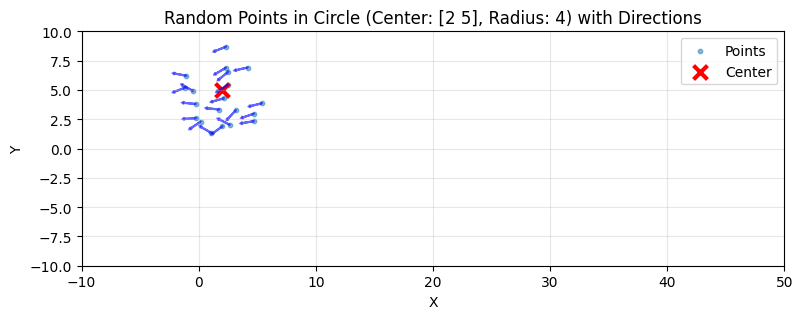

In [5]:
# Test the functions
test_media = np.array([2, 5])
test_size = 20
test_radius = 4
test_median_angle = np.pi  # pointing left
test_std_dev_angle = np.pi / 10  # 45 degrees spread

test_points, test_directions = generate_random_points_in_circle(
    test_media, test_size, test_radius, test_median_angle, test_std_dev_angle
)

print(f"Generated {test_size} points")
print(f"Center: {test_media}, Radius: {test_radius}")
print(f"Points shape: {test_points.shape}")
print(f"Directions shape: {test_directions.shape}")
print(f"Direction angles - Mean: {test_median_angle:.3f}, Std Dev: {test_std_dev_angle:.3f}")
print(f"\nFirst 5 points:\n{test_points[:5]}")
print(f"\nFirst 5 directions (radians):\n{test_directions[:5]}")

plot_points_in_circle(
    test_points, test_media, test_radius, 
    theta_directions=test_directions,
    x_range=(-10, 50), y_range=(-10, 10),
    show_arrows=True,
    show_circle=False,
    arrow_length=1.0
)


# Path generation

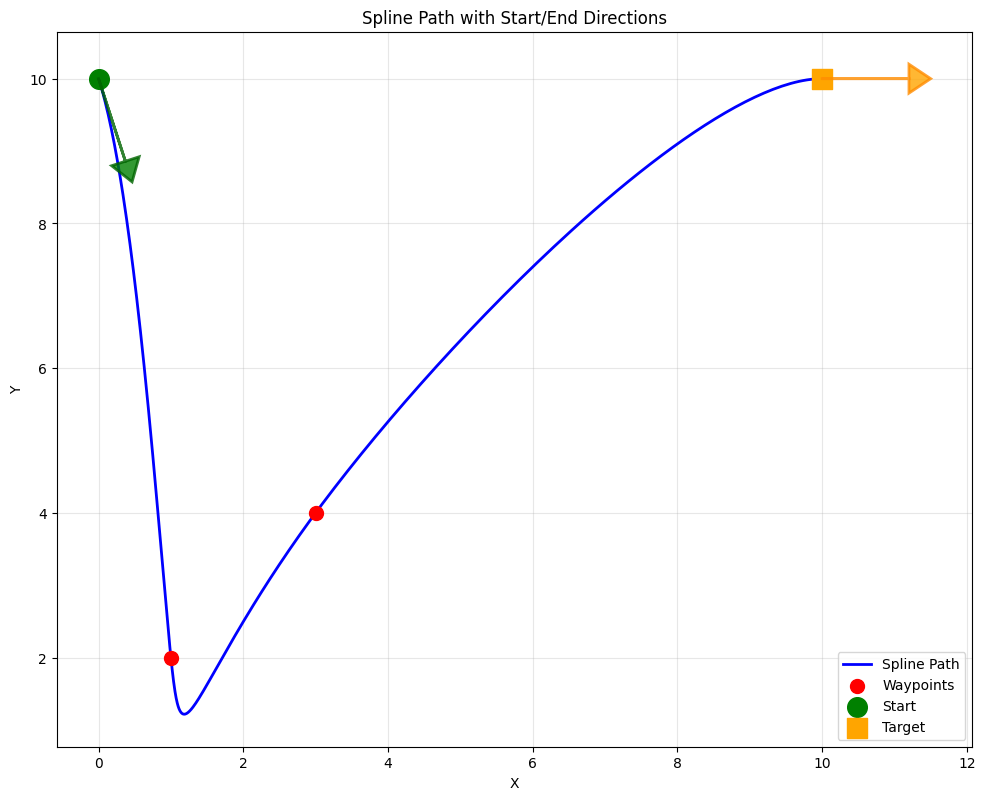

Start point (x, y, theta): (0, 10, 5.027)
Target point (x, y, theta): (10, 10, 0.000)
Waypoints (no direction): 2 points
Path respects start and end tangent directions


In [21]:
# Same points but with theta parameters
# Specify theta direction for start and target points
start_theta = 1.6 * np.pi  # radians (0 = right, π/2 = up, π = left, 3π/2 = down)
target_theta = 0.0 * np.pi  # radians

# Start point with direction
start_point_with_dir = np.array([start_point[0], start_point[1], start_theta])
# Target point with direction
target_point_with_dir = np.array([target_point[0], target_point[1], target_theta])

# Spline points remain as waypoints (no direction)
# spline_points already defined from previous cell

# Create cubic spline with derivatives to respect start and end directions
# Calculate desired derivatives from theta - these are the tangent directions
# Increase magnitude to enforce direction more strongly
derivative_magnitude = 5.0  # Adjust this to control how strongly the direction is enforced
start_derivative = derivative_magnitude * np.array([np.cos(start_theta), np.sin(start_theta)])
target_derivative = derivative_magnitude * np.array([np.cos(target_theta), np.sin(target_theta)])

# Combine all points for the path: start -> spline_points -> target
path_control_points = np.vstack([start_point, spline_points, target_point])

# Create parameter t for interpolation
t = np.arange(len(path_control_points))

# Create cubic spline with boundary conditions for derivatives
# bc_type=((1, derivative), (1, derivative)) sets first derivative at start and end
cs_x = CubicSpline(t, path_control_points[:, 0], bc_type=((1, start_derivative[0]), (1, target_derivative[0])))
cs_y = CubicSpline(t, path_control_points[:, 1], bc_type=((1, start_derivative[1]), (1, target_derivative[1])))

# Generate smooth path with more points
t_smooth = np.linspace(0, len(path_control_points) - 1, 300)
smooth_path_x = cs_x(t_smooth)
smooth_path_y = cs_y(t_smooth)
smooth_path_with_dir = np.column_stack((smooth_path_x, smooth_path_y))

# Plot the spline path with theta directions
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the smooth spline path
ax.plot(smooth_path_with_dir[:, 0], smooth_path_with_dir[:, 1], 'b-', linewidth=2, label='Spline Path')

# Plot direction arrows only for start and target points
arrow_length = 1.2
# Start point arrow
dx_start = arrow_length * np.cos(start_theta)
dy_start = arrow_length * np.sin(start_theta)
ax.arrow(start_point[0], start_point[1], dx_start, dy_start, head_width=0.4, head_length=0.3, fc='green', ec='darkgreen', alpha=0.8, zorder=7, linewidth=2)

# Target point arrow
dx_target = arrow_length * np.cos(target_theta)
dy_target = arrow_length * np.sin(target_theta)
ax.arrow(target_point[0], target_point[1], dx_target, dy_target, head_width=0.4, head_length=0.3, fc='orange', ec='darkorange', alpha=0.8, zorder=7, linewidth=2)

# Plot control points (waypoints - no direction)
ax.scatter(spline_points[:, 0], spline_points[:, 1], color='red', s=100, zorder=5, label='Waypoints')

# Highlight start and target points
ax.scatter(start_point[0], start_point[1], color='green', s=200, marker='o', zorder=6, label='Start')
ax.scatter(target_point[0], target_point[1], color='orange', s=200, marker='s', zorder=6, label='Target')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Spline Path with Start/End Directions')
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.legend()

plt.tight_layout()
plt.show()

print(f"Start point (x, y, theta): ({start_point[0]}, {start_point[1]}, {start_theta:.3f})")
print(f"Target point (x, y, theta): ({target_point[0]}, {target_point[1]}, {target_theta:.3f})")
print(f"Waypoints (no direction): {len(spline_points)} points")
print(f"Path respects start and end tangent directions")


In [22]:

def generate_spline_path(start_point, spline_points, target_point, num_points=300, derivative_magnitude=5.0):
    """
    Generate a smooth spline path through control points.
    
    Parameters:
    - start_point: starting point [x, y, theta] - MUST have 3 components
    - spline_points: array of intermediate waypoints [[x1, y1], [x2, y2], ...]
    - target_point: target point [x, y, theta] - MUST have 3 components
    - num_points: number of points in the smooth path
    - derivative_magnitude: magnitude to enforce direction (higher = stronger enforcement)
    
    Returns:
    - smooth_path: array of smooth path points
    - path_points: array of control points used
    """
    from scipy.interpolate import CubicSpline
    
    # Extract theta from start and target points (REQUIRED)
    start_theta = start_point[2]
    target_theta = target_point[2]
    
    # Extract x, y coordinates
    start_xy = start_point[:2]
    target_xy = target_point[:2]
    
    # Combine all points for the path: start -> spline_points -> target
    path_points = np.vstack([start_xy, spline_points, target_xy])
    
    # Create parameter t for interpolation (distance along the path)
    t = np.arange(len(path_points))
    
    # Calculate derivatives from theta angles (ALWAYS present)
    start_derivative = derivative_magnitude * np.array([np.cos(start_theta), np.sin(start_theta)])
    target_derivative = derivative_magnitude * np.array([np.cos(target_theta), np.sin(target_theta)])
    
    # Create cubic spline with boundary conditions for derivatives
    bc_type_x = ((1, start_derivative[0]), (1, target_derivative[0]))
    bc_type_y = ((1, start_derivative[1]), (1, target_derivative[1]))
    
    cs_x = CubicSpline(t, path_points[:, 0], bc_type=bc_type_x)
    cs_y = CubicSpline(t, path_points[:, 1], bc_type=bc_type_y)
    
    # Generate smooth path with more points
    t_smooth = np.linspace(0, len(path_points) - 1, num_points)
    path_x = cs_x(t_smooth)
    path_y = cs_y(t_smooth)
    
    # Combine into array of path points
    smooth_path = np.column_stack((path_x, path_y))
    
    return smooth_path, path_points


def plot_spline_path(smooth_path, control_points, start_point, target_point, arrow_length=1.2):
    """
    Plot a spline path with direction arrows.
    
    Parameters:
    - smooth_path: array of path points
    - control_points: array of control points
    - start_point: starting point [x, y, theta] - MUST have 3 components
    - target_point: target point [x, y, theta] - MUST have 3 components
    - arrow_length: length of direction arrows
    """
    # Extract theta from start and target points (REQUIRED)
    start_theta = start_point[2]
    target_theta = target_point[2]
    
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Plot the smooth spline path
    ax.plot(smooth_path[:, 0], smooth_path[:, 1], 'b-', linewidth=2, label='Spline Path')
    
    # Plot direction arrows
    dx_start = arrow_length * np.cos(start_theta)
    dy_start = arrow_length * np.sin(start_theta)
    ax.arrow(start_point[0], start_point[1], dx_start, dy_start, 
            head_width=0.4, head_length=0.3, fc='green', ec='darkgreen', 
            alpha=0.8, zorder=7, linewidth=2)
    
    dx_target = arrow_length * np.cos(target_theta)
    dy_target = arrow_length * np.sin(target_theta)
    ax.arrow(target_point[0], target_point[1], dx_target, dy_target, 
            head_width=0.4, head_length=0.3, fc='orange', ec='darkorange', 
            alpha=0.8, zorder=7, linewidth=2)
    
    # Plot control points (waypoints - no direction)
    ax.scatter(control_points[:, 0], control_points[:, 1], color='red', s=100, zorder=5, label='Waypoints')
    
    # Highlight start and target points
    ax.scatter(start_point[0], start_point[1], color='green', s=200, marker='o', zorder=6, label='Start')
    ax.scatter(target_point[0], target_point[1], color='orange', s=200, marker='s', zorder=6, label='Target')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Spline Path with Start/End Directions')
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    plt.tight_layout()
    plt.show()

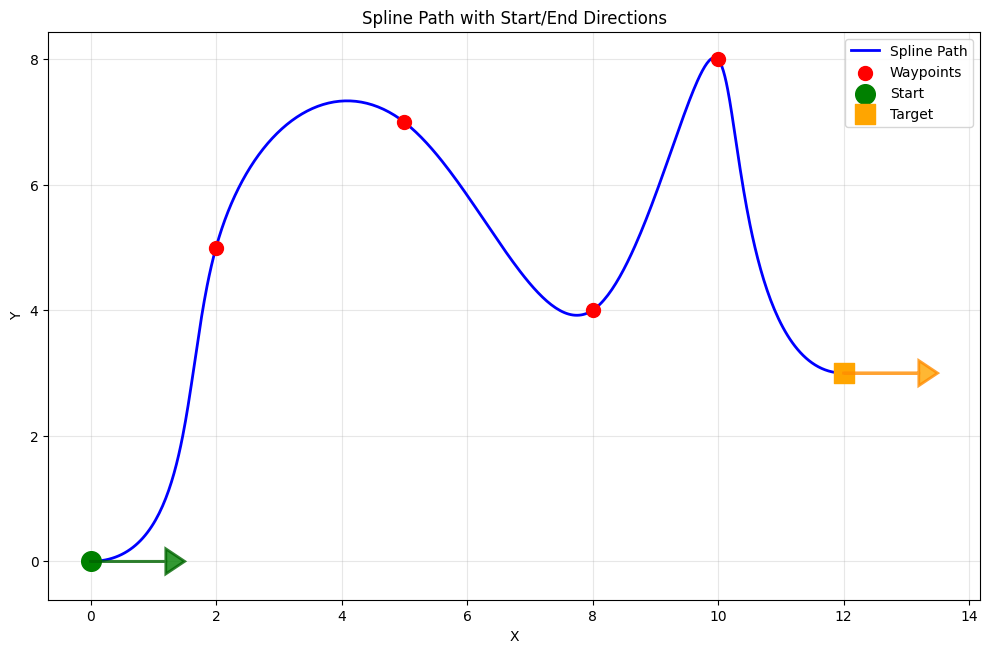

Path created with 6 control points
Smooth path generated with 400 points
Start point (x, y, theta): (0.0, 0.0, 0.000)
Target point (x, y, theta): (12.0, 3.0, 0.000)
Waypoints (no direction): 4 points
Path respects start and end tangent directions


In [24]:
# Test the updated functions with [x, y, theta] format
# Define start and target with direction angles
test_start = np.array([0, 0, 0.0 * np.pi])  # [x, y, theta] - pointing down-right
test_target = np.array([12, 3, 0.0 * np.pi])  # [x, y, theta] - pointing right

# Waypoints remain as [x, y] only
test_spline = np.array([[2, 5], [5, 7], [8, 4], [10, 8]])

# Generate spline path - theta will be extracted automatically
smooth_path, control_points = generate_spline_path(
    test_start, test_spline, test_target, 
    num_points=400,
    derivative_magnitude=5.0
)

# Plot the path - theta will be extracted automatically
plot_spline_path(smooth_path, control_points, test_start, test_target, arrow_length=1.2)

# Print results
print(f"Path created with {len(control_points)} control points")
print(f"Smooth path generated with {len(smooth_path)} points")
print(f"Start point (x, y, theta): ({test_start[0]}, {test_start[1]}, {test_start[2]:.3f})")
print(f"Target point (x, y, theta): ({test_target[0]}, {test_target[1]}, {test_target[2]:.3f})")
print(f"Waypoints (no direction): {len(test_spline)} points")
print(f"Path respects start and end tangent directions")


# Random points + Paths

In [ ]:
# Generate random start points
center = np.array([5, 5])
radius = 3
num_start_points = 50

start_points = generate_random_points_in_circle(center, num_start_points, radius)

# Define single target point
target_point = np.array([15, 5])

# Define two spline control points (same for all paths)
spline_control_points = np.array([[10, 8], [13, 3]])

# Create figure
fig, ax = plt.subplots(figsize=(12, 8))

# Generate and plot path for each start point
for i, start_pt in enumerate(start_points):
    smooth_path, control_pts = generate_spline_path(start_pt, spline_control_points, target_point, num_points=200)
    if i == 0:
        ax.plot(smooth_path[:, 0], smooth_path[:, 1], linewidth=2, alpha=0.7, label='Paths')
    else:
        ax.plot(smooth_path[:, 0], smooth_path[:, 1], linewidth=2, alpha=0.7)

# Plot start points
ax.scatter(start_points[:, 0], start_points[:, 1], color='green', s=150, zorder=5, edgecolors='black', linewidths=2, label='Start Points')

# Plot target point
ax.scatter(target_point[0], target_point[1], color='red', s=250, marker='s', zorder=6, edgecolors='black', linewidths=2, label='Target')

# Plot spline control points
ax.scatter(spline_control_points[:, 0], spline_control_points[:, 1], color='orange', s=120, marker='D', zorder=5, edgecolors='black', linewidths=1.5, label='Spline Points')

# Plot circle area
circle = plt.Circle((center[0], center[1]), radius, color='lightblue', fill=False, linestyle='--', linewidth=2, alpha=0.5)
ax.add_patch(circle)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title(f'Multiple Paths from Random Start Points to Single Target')
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

print(f"Generated {num_start_points} paths")
print(f"Each path uses {len(spline_control_points)} spline control points")


In [ ]:
# Generate random start points
start_center = np.array([2, 5])
start_radius = 2
num_start_points = 10

start_points = generate_random_points_in_circle(start_center, num_start_points, start_radius)

# Generate first spline pool
spline1_center = np.array([8, 7])
spline1_radius = 1
num_spline1_points = 12

spline1_pool = generate_random_points_in_circle(spline1_center, num_spline1_points, spline1_radius)

# Generate second spline pool
spline2_center = np.array([13, 0])
spline2_radius = 0.8
num_spline2_points = 15

spline2_pool = generate_random_points_in_circle(spline2_center, num_spline2_points, spline2_radius)

# Define single target point
target_point = np.array([18, 5])

# Create figure
fig, ax = plt.subplots(figsize=(14, 8))

# Generate and plot path for each start point
for i, start_pt in enumerate(start_points):
    # Randomly select one point from first spline pool
    spline1_idx = np.random.randint(0, num_spline1_points)
    spline1_point = spline1_pool[spline1_idx]
    
    # Randomly select one point from second spline pool
    spline2_idx = np.random.randint(0, num_spline2_points)
    spline2_point = spline2_pool[spline2_idx]
    
    # Combine the two spline points in order
    selected_splines = np.array([spline1_point, spline2_point])
    
    smooth_path, control_pts = generate_spline_path(start_pt, selected_splines, target_point, num_points=200)
    
    if i == 0:
        ax.plot(smooth_path[:, 0], smooth_path[:, 1], linewidth=2, alpha=0.6, label='Paths')
    else:
        ax.plot(smooth_path[:, 0], smooth_path[:, 1], linewidth=2, alpha=0.6)

# Plot start points area
circle_start = plt.Circle((start_center[0], start_center[1]), start_radius, color='green', fill=False, linestyle='--', linewidth=2, alpha=0.5)
ax.add_patch(circle_start)
ax.scatter(start_points[:, 0], start_points[:, 1], color='green', s=150, zorder=5, edgecolors='black', linewidths=2, label='Start Points')

# Plot first spline pool area
circle_spline1 = plt.Circle((spline1_center[0], spline1_center[1]), spline1_radius, color='orange', fill=False, linestyle='--', linewidth=2, alpha=0.5)
ax.add_patch(circle_spline1)
ax.scatter(spline1_pool[:, 0], spline1_pool[:, 1], color='orange', s=80, alpha=0.6, zorder=4, edgecolors='black', linewidths=1, label='Spline 1 Pool')

# Plot second spline pool area
circle_spline2 = plt.Circle((spline2_center[0], spline2_center[1]), spline2_radius, color='purple', fill=False, linestyle='--', linewidth=2, alpha=0.5)
ax.add_patch(circle_spline2)
ax.scatter(spline2_pool[:, 0], spline2_pool[:, 1], color='purple', s=80, alpha=0.6, zorder=4, edgecolors='black', linewidths=1, label='Spline 2 Pool')

# Plot target point
ax.scatter(target_point[0], target_point[1], color='red', s=250, marker='s', zorder=6, edgecolors='black', linewidths=2, label='Target')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Multiple Paths with Two Spline Pools')
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

print(f"Generated {num_start_points} paths")
print(f"Start points: {num_start_points} points")
print(f"Spline 1 pool: {num_spline1_points} points")
print(f"Spline 2 pool: {num_spline2_points} points")
print(f"Each path randomly selects 1 point from Spline 1 pool, then 1 point from Spline 2 pool")


In [ ]:
# UPDATED FUNCTIONS - Start and target MUST be [x, y, theta], waypoints are [x, y]

def generate_spline_path(start_point, spline_points, target_point, num_points=300, derivative_magnitude=5.0):
    """
    Generate a smooth spline path through control points.
    
    Parameters:
    - start_point: starting point [x, y, theta] - MUST have 3 components
    - spline_points: array of intermediate waypoints [[x1, y1], [x2, y2], ...]
    - target_point: target point [x, y, theta] - MUST have 3 components
    - num_points: number of points in the smooth path
    - derivative_magnitude: magnitude to enforce direction (higher = stronger enforcement)
    
    Returns:
    - smooth_path: array of smooth path points
    - path_points: array of control points used
    """
    from scipy.interpolate import CubicSpline
    
    # Extract theta from start and target points (REQUIRED)
    start_theta = start_point[2]
    target_theta = target_point[2]
    
    # Extract x, y coordinates
    start_xy = start_point[:2]
    target_xy = target_point[:2]
    
    # Combine all points for the path: start -> spline_points -> target
    path_points = np.vstack([start_xy, spline_points, target_xy])
    
    # Create parameter t for interpolation (distance along the path)
    t = np.arange(len(path_points))
    
    # Calculate derivatives from theta angles (ALWAYS present)
    start_derivative = derivative_magnitude * np.array([np.cos(start_theta), np.sin(start_theta)])
    target_derivative = derivative_magnitude * np.array([np.cos(target_theta), np.sin(target_theta)])
    
    # Create cubic spline with boundary conditions for derivatives
    bc_type_x = ((1, start_derivative[0]), (1, target_derivative[0]))
    bc_type_y = ((1, start_derivative[1]), (1, target_derivative[1]))
    
    cs_x = CubicSpline(t, path_points[:, 0], bc_type=bc_type_x)
    cs_y = CubicSpline(t, path_points[:, 1], bc_type=bc_type_y)
    
    # Generate smooth path with more points
    t_smooth = np.linspace(0, len(path_points) - 1, num_points)
    path_x = cs_x(t_smooth)
    path_y = cs_y(t_smooth)
    
    # Combine into array of path points
    smooth_path = np.column_stack((path_x, path_y))
    
    return smooth_path, path_points


def plot_spline_path(smooth_path, control_points, start_point, target_point, arrow_length=1.2):
    """
    Plot a spline path with direction arrows.
    
    Parameters:
    - smooth_path: array of path points
    - control_points: array of control points
    - start_point: starting point [x, y, theta] - MUST have 3 components
    - target_point: target point [x, y, theta] - MUST have 3 components
    - arrow_length: length of direction arrows
    """
    # Extract theta from start and target points (REQUIRED)
    start_theta = start_point[2]
    target_theta = target_point[2]
    
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Plot the smooth spline path
    ax.plot(smooth_path[:, 0], smooth_path[:, 1], 'b-', linewidth=2, label='Spline Path')
    
    # Plot direction arrows
    dx_start = arrow_length * np.cos(start_theta)
    dy_start = arrow_length * np.sin(start_theta)
    ax.arrow(start_point[0], start_point[1], dx_start, dy_start, 
            head_width=0.4, head_length=0.3, fc='green', ec='darkgreen', 
            alpha=0.8, zorder=7, linewidth=2)
    
    dx_target = arrow_length * np.cos(target_theta)
    dy_target = arrow_length * np.sin(target_theta)
    ax.arrow(target_point[0], target_point[1], dx_target, dy_target, 
            head_width=0.4, head_length=0.3, fc='orange', ec='darkorange', 
            alpha=0.8, zorder=7, linewidth=2)
    
    # Plot control points (waypoints - no direction)
    ax.scatter(control_points[:, 0], control_points[:, 1], color='red', s=100, zorder=5, label='Waypoints')
    
    # Highlight start and target points
    ax.scatter(start_point[0], start_point[1], color='green', s=200, marker='o', zorder=6, label='Start')
    ax.scatter(target_point[0], target_point[1], color='orange', s=200, marker='s', zorder=6, label='Target')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Spline Path with Start/End Directions')
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    plt.tight_layout()
    plt.show()


In [ ]:
# Test the updated functions with [x, y, theta] format
# Define start and target with direction angles
test_start = np.array([0, 0, 1.6 * np.pi])  # [x, y, theta] - pointing down-right
test_target = np.array([12, 3, 0.0 * np.pi])  # [x, y, theta] - pointing right

# Waypoints remain as [x, y] only
test_spline = np.array([[2, 5], [5, 7], [8, 4], [10, 8]])

# Generate spline path - theta will be extracted automatically
smooth_path, control_points = generate_spline_path(
    test_start, test_spline, test_target, 
    num_points=400,
    derivative_magnitude=5.0
)

# Plot the path - theta will be extracted automatically
plot_spline_path(smooth_path, control_points, test_start, test_target, arrow_length=1.2)

# Print results
print(f"Path created with {len(control_points)} control points")
print(f"Smooth path generated with {len(smooth_path)} points")
print(f"Start point (x, y, theta): ({test_start[0]}, {test_start[1]}, {test_start[2]:.3f})")
print(f"Target point (x, y, theta): ({test_target[0]}, {test_target[1]}, {test_target[2]:.3f})")
print(f"Waypoints (no direction): {len(test_spline)} points")
print(f"Path respects start and end tangent directions")
